### Practical Task 2

* Create a Jupyter Notebook named diabetes_regression.ipynb
* Read diabetes_updated.csv into the Jupyter Notebook
* The data designed to predict a person’s progression in the condition with respect to various attributes about them.
* Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.
* Generate training and test sets comprising 80% and 20% of the data, respectively.
* Analyze the types of features in this data set. Identify features require us to use StandardScaler from sklearn.preprocessing. Use StandardScaler on the appropriate features of the train set and test sets.
* Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [543]:
import numpy as np
import pandas as pd
import sklearn
# Import required libraries for data and analysis to perform EDA

import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for Graph plotting

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
# Used sklearn specific library to deal with scaling, imputation and linear regression

%matplotlib inline
# Line of code helpful to save and pan, as using Matplotlib to plot and render interactive plots

In [544]:
df = pd.read_csv('diabetes_updated.csv')
df.head(10)
# Import the diabetes_updated dataset and check its loaded correctly

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [545]:
df.info()
# Show total rows (no. of observations), columns (features) and columns details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [546]:
df.describe()
# Using describe(), review and get feel for data along with basic statistics.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [547]:
df.isnull().sum()
# Check number of missing values from the dataset. There are no missing values in the dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

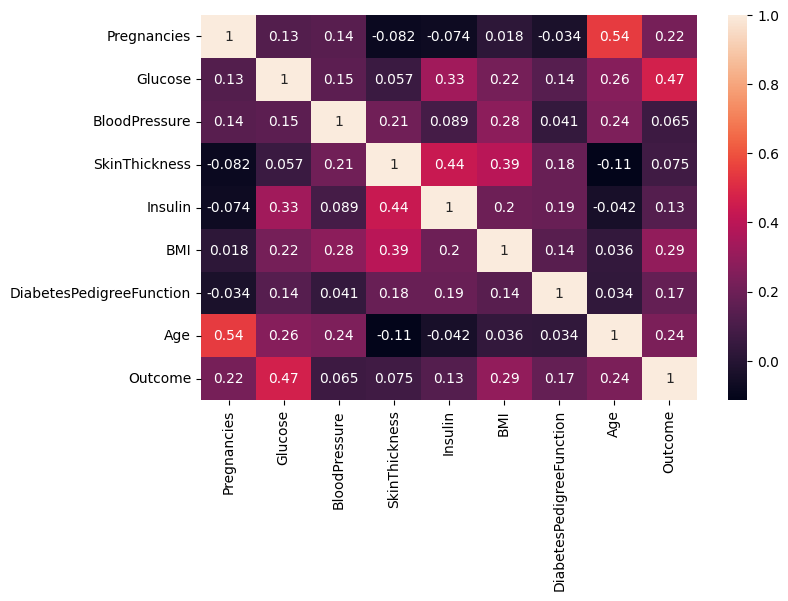

In [548]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket')
# Heatmap to show correlation between all variables

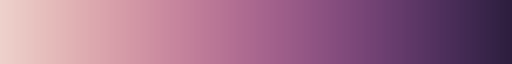

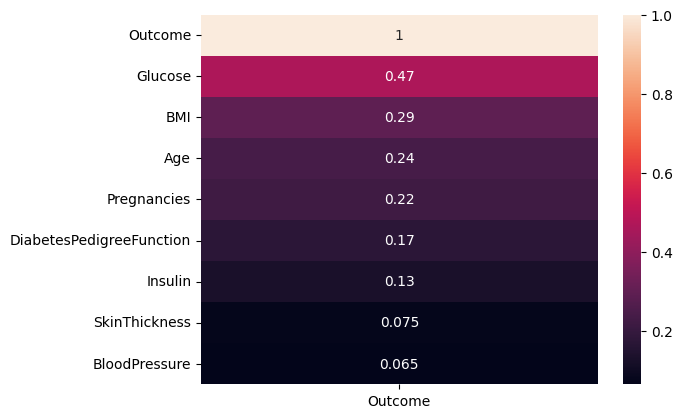

In [549]:
corr = df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
sns.heatmap(corr, annot=True)
sns.cubehelix_palette(as_cmap=True)
# Shows heatmap in descending order. To help with a better view of correlation between top key variables 


In [550]:
df_new = df[['Glucose','BMI','Age', 'Pregnancies', 'BloodPressure', 'SkinThickness','Outcome']]
df_new.head()
# Created new dataframe with highly correlated variables, and updated these in columns to get better predictions for the linear regression model.

,Glucose,BMI,Age,Pregnancies,BloodPressure,SkinThickness,Outcome
0,148,33.6,50,6,72,35,1
1,85,26.6,31,1,66,29,0
2,183,23.3,32,8,64,0,1
3,89,28.1,21,1,66,23,0
4,137,43.1,33,0,40,35,1


<Axes: >

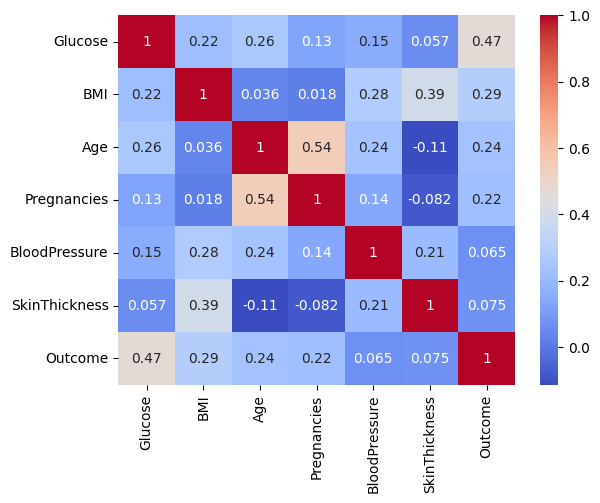

In [551]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
# Heatmap for new data visualization.

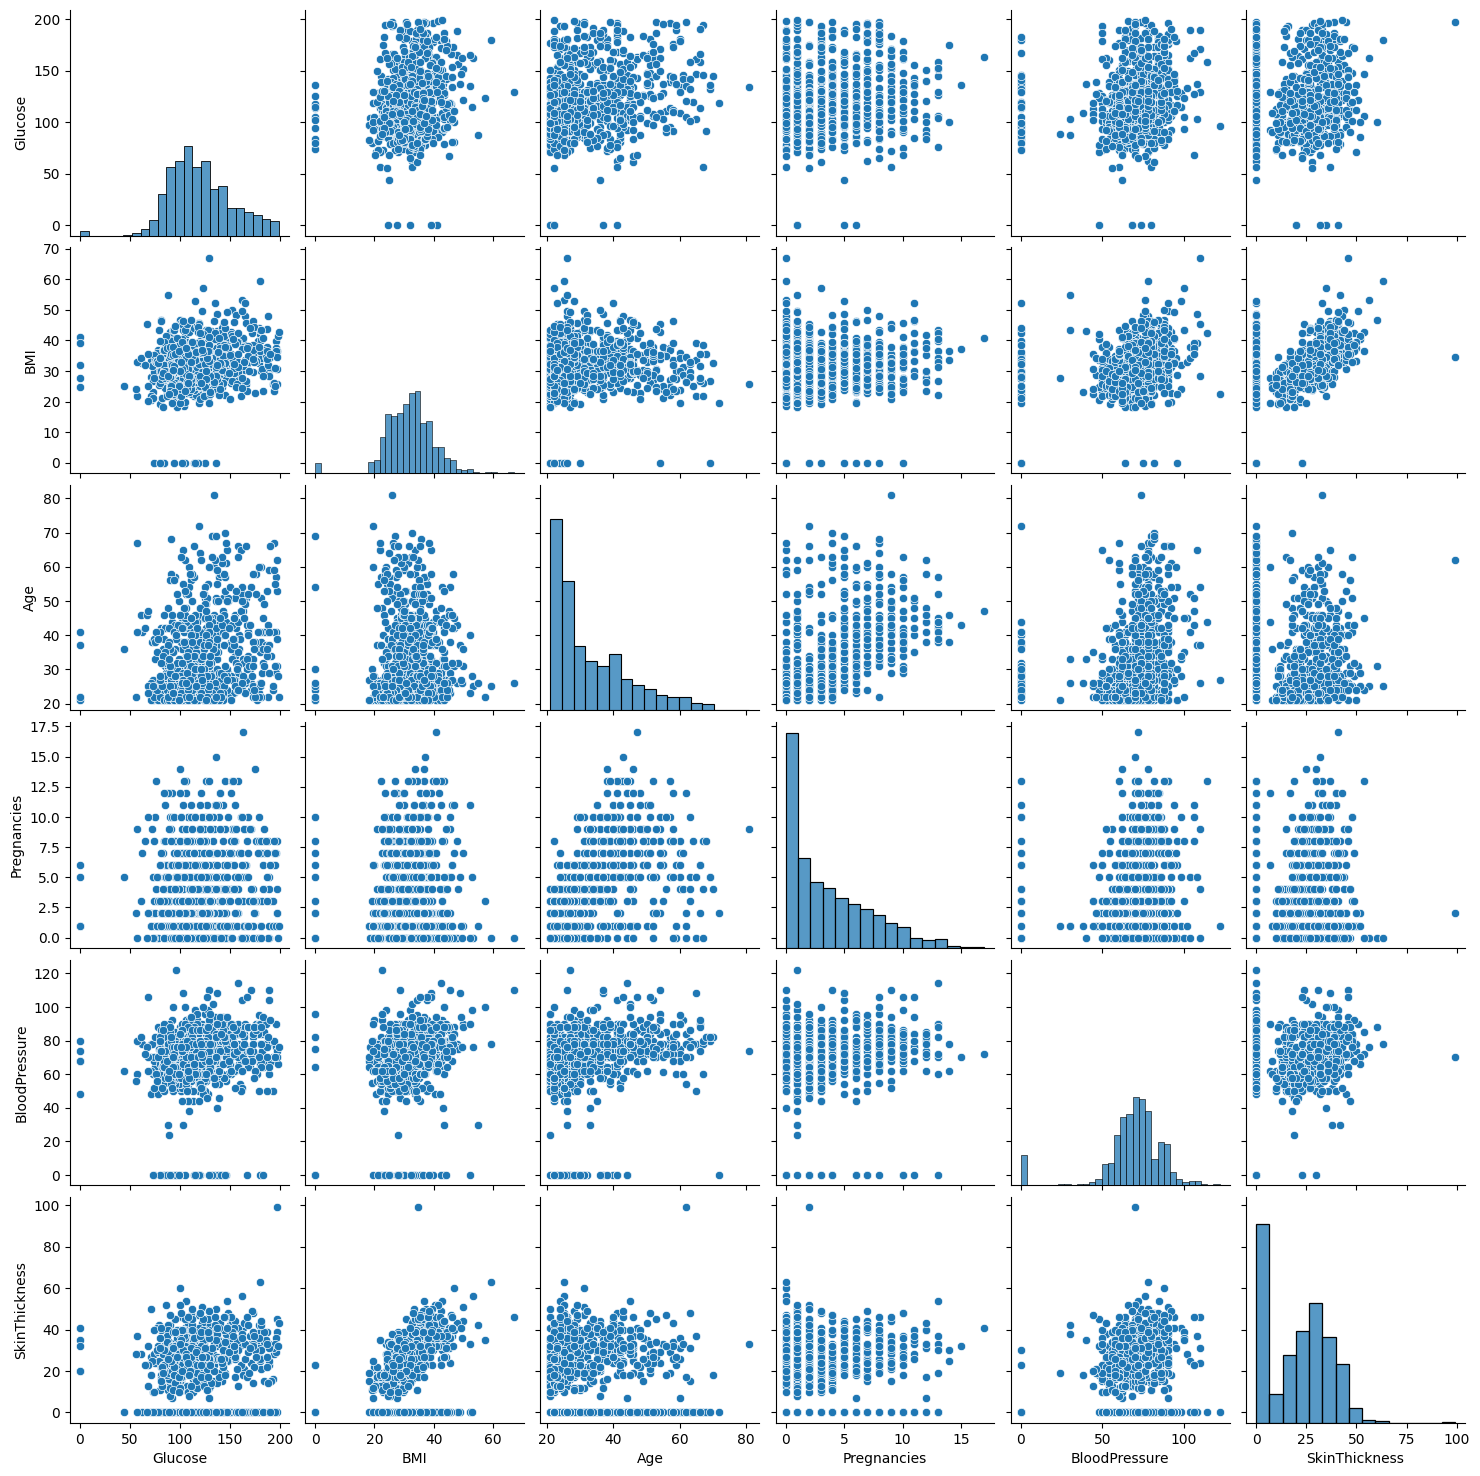

In [552]:
sns.pairplot(df_new[['Glucose', 'BMI','Age', 'Pregnancies', 'BloodPressure', 'SkinThickness']])
# Show hisplot of independent variables

C:\Users\User\AppData\Local\Temp\ipykernel_27736\4112564788.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  with_zeroised_box_all.set_xticklabels(with_zeroised_box_all.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Glucose'),
 Text(1, 0, 'BMI'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'Pregnancies'),
 Text(4, 0, 'BloodPressure'),
 Text(5, 0, 'SkinThickness'),
 Text(6, 0, 'Outcome')]

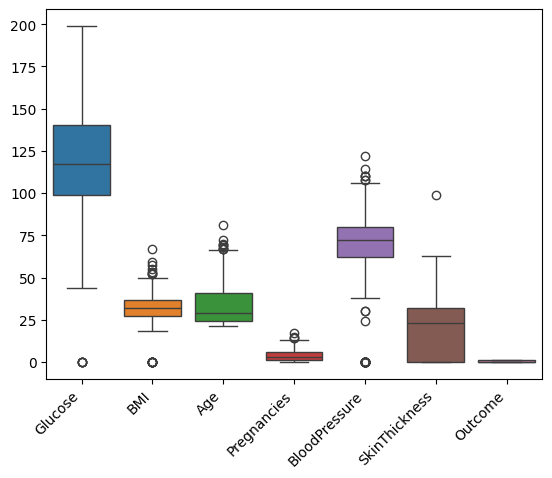

In [553]:
with_zeroised_box_all = sns.boxplot(df_new)
with_zeroised_box_all.set_xticklabels(with_zeroised_box_all.get_xticklabels(), rotation=45, horizontalalignment='right')

In [554]:
X = df_new.drop('Outcome', axis=1)
y = df_new[['Outcome']]
# Arrange data features into X and target into y.

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)
# Split data into training and test sets, comprising 80% and 20% of the data, respectively.

Training data: (614, 6) (614, 1)
Test data: (154, 6) (154, 1)


In [556]:
scaled = StandardScaler()
scaled.fit(X_train)
# Scale data with Standardscaler for specific independent variable select after EDA, as per the requirement

X_train = scaled.transform(X_train)
X_test = scaled.transform(X_test)
# Apply the scaler on train and test data

In [557]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
# Fit the model

'''
MSE = 2900.193628493484
MAE = 42.79409467959996
R2 = 0.45260276297191904

'''

LinearRegression()

In [558]:
y_pred = reg_model.predict(X_test)
# Predict X_test data.

In [559]:
print ('Intercept: \n', reg_model.intercept_)
print('Coffficients: \n', reg_model.coef_)
# Print intercept and coefficients

Intercept: 
 [0.34690554]
Coffficients: 
 [[ 1.73479624e-01  1.19513327e-01  7.68485990e-02  3.49582016e-02
  -4.21947222e-02 -9.69953351e-05]]


In [560]:
Accuracy = r2_score(y_test,y_pred) * 100
print(Accuracy)
# Print accuracy

24.35015531279381


Text(0, 0.5, 'Predicted')

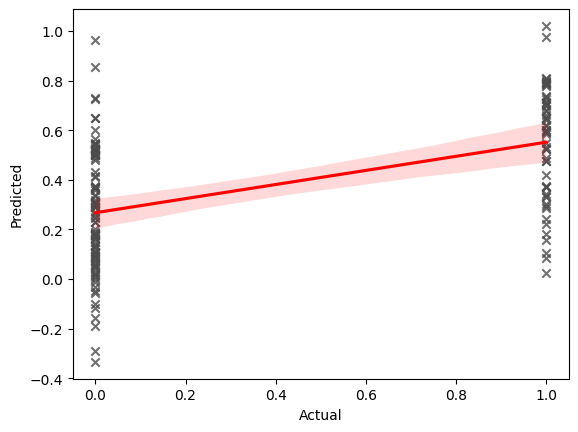

In [561]:
sns.regplot(x=y_test,y=y_pred,ci=99, marker="x", color=".3", line_kws=dict(color="r"))
plt.xlabel('Actual')
plt.ylabel('Predicted')
# Prediction values 

In [562]:
n_df = (df_new - df_new.mean())/ df_new.std()
n_df.head()
# Normalise numeric data

,Glucose,BMI,Age,Pregnancies,BloodPressure,SkinThickness,Outcome
0,0.847771,0.203880,1.425067,0.639530,0.149543,0.906679,1.365006
1,-1.122665,-0.683976,-0.190548,-0.844335,-0.160441,0.530556,-0.731643
2,1.942458,-1.102537,-0.105515,1.233077,-0.263769,-1.287373,1.365006
3,-0.997558,-0.493721,-1.040871,-0.844335,-0.160441,0.154433,-0.731643
4,0.503727,1.408828,-0.020483,-1.141108,-1.503707,0.906679,1.365006


In [563]:
X_feature = n_df.drop('Outcome', axis=1)
y_target = n_df[['Outcome']]
# Arrange data features into X and target into y again after scaling.

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=40)
# Split data into training and test sets after scaling.


In [565]:
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)
# Fit the model after scaling.

LinearRegression()

In [566]:
y_pred = multi_reg_model.predict(X_test)
# Prediction after scaling

In [567]:
print('Intercept: \n', multi_reg_model.intercept_)
print('Coefficient: \n', multi_reg_model.coef_)
# print model's intercept and coefficient values.

Intercept: 
 [-0.0112934]
Coefficient: 
 [[ 0.3783256   0.22172194  0.03640268  0.18576345 -0.0901824   0.01491217]]


In [568]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error (y_test, y_pred)

print (f'Mean Squared Error: {mse}')
print (f'R-squared: {r2}')
print (f'Mean Absolute Error: {mae}')
# Print MAE, R2 and MAE values.

Mean Squared Error: 0.7383263171125343
R-squared: 0.289339155015955
Mean Absolute Error: 0.7306624863147112


Text(0, 0.5, 'Predicted after scaling')

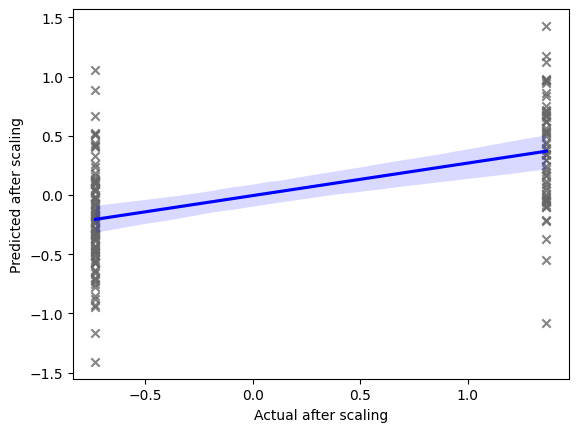

In [569]:
sns.regplot(x=y_test,y=y_pred,ci=99, marker="x", color=".4", line_kws=dict(color="b"))
plt.xlabel('Actual after scaling')
plt.ylabel('Predicted after scaling')

This score is note as high or close to 1, which suggests that our model fits our observations not very well.